# 2011 India Census analysis
- Census is nothing but a process of collecting, compiling, analyzing, evaluating, publishing and disseminating statistical data regarding the population. 
- It is a reflection of truth and facts as they exist in a country about its people, their diversity of habitation, religion, culture, language, education, health and socio-economic status. 
- The word ‘Census’ is derived from the Latin word ‘Censere’ meaning ‘to assess or to rate’.
- It covers demographic, social and economic data and are provided as of a particular date. Census is useful for formulation of development policies and plans and demarcating constituencies for elections. 
- The Census of India has been conducted 15 times, As of 2011. It has been conducted every 10 years, beginning in 1871.

**IMPORTING LIBRARIES**

In [1]:
import mpl_toolkits
import dask.dataframe as dd

In [2]:
# Load libraries
import pandas as pd
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
from itertools import groupby
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math
from mpl_toolkits.basemap import BaseMap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)


**LOADING THE DATA**

In [4]:
# Load dataset
%time data = pd.read_csv("india-districts-census-2011.csv")

CPU times: user 21.8 ms, sys: 4.83 ms, total: 26.6 ms
Wall time: 26.9 ms


**Dimensions of the dataset**

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [5]:
data.shape

(640, 118)

In [6]:
data.head(30)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,...,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,36913,33439,229064,190899,38165,123837,105227,641290,34680,56759,7946,129679,...,31982,10700,14886,42727,27121,46181,80569,14618,2218,2622,330,74,8968,259,494,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,343,25,23912,12383,11529,214866,162578,52288,132003,82863,538879,55299,36630,29102,93835,...,23640,7998,11899,59121,13440,14303,71441,15255,2962,3493,452,79,9030,201,436,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,444,44,95857,47543,48314,75079,53265,21814,57125,17954,58408,20869,1645,1020,51545,...,10528,4422,3804,5378,1758,6784,12742,3492,716,835,87,32,3708,33,76,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,12,6,122336,62652,59684,51873,39839,12034,28941,22932,88929,8266,3763,1222,38622,...,4991,1652,2356,6832,4866,7031,10366,3835,1252,1643,308,83,2368,39,87,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,406,150,176101,90274,85827,161393,117677,43716,73247,88146,315442,54264,31583,3930,71616,...,44517,15825,18028,31443,3952,38654,70995,9180,1148,1250,87,15,7453,117,268,78,346,35,50,85,59,8,67,12,629
5,6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,224469,139640,48157,25170,22987,232815,121374,111441,290912,184752,106160,130377,160535,351503,136527,24016,4656,125713,...,70033,25803,26161,35702,3381,64169,103780,8246,710,781,55,16,11193,135,323,120,443,42,58,100,72,22,94,15,786
6,7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,228499,160705,141224,74644,66580,53307,27693,25614,200431,161548,38883,142847,57584,416004,69533,21566,3952,105380,...,67133,26670,27609,33057,7776,29223,87230,15954,3596,4489,752,141,10163,139,340,174,514,54,69,123,78,52,130,28,936
7,8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,337170,207979,1476,1451,25,37705,20237,17468,304200,249581,54619,187959,116241,703839,57495,62246,15084,169375,...,55314,18929,25972,60195,22992,26880,104921,23218,4740,5655,746,169,12196,387,795,254,1049,155,190,345,177,78,255,64,2100
8,9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,117058,68921,392,375,17,75374,39398,35976,149317,101380,47937,75173,74144,242915,28232,32882,20484,67719,...,20321,6910,9473,24079,9829,20368,40502,8908,1834,2272,371,67,5112,6,18,11,29,2,2,4,3,3,6,0,45
9,10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,431746,316838,1068,995,73,8935,5021,3914,407188,333151,74037,330547,76641,829641,12228,10408,20095,364457,...,94928,37998,41505,49622,13946,2815,117581,23234,6314,7640,1075,251,18993,251,427,668,1095,319,380,699,240,370,610,445,3099


# Feature Aggregtion

In [25]:
Caste = ['SC','Male_SC','Female_SC','ST','Male_ST','Female_ST']
Religion = ['Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated']
Workers = ['Workers','Male_Workers','Female_Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers','Other_Workers']
Education = ['Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education','Literate_Education','Illiterate_Education','Total_Education','Male_Literate','Female_Literate']
Age = ['Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age not stated']
Basic_needs = ['LPG_or_PNG_Households','Housholds_with_Electric_Lighting','Households_with_Internet','Households_with_Computer']
Socio_economic_status = ['Households_with_Bicycle','Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped','Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only','Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone','Households_with_Telephone_Mobile_Phone_Both']
Living_standards = ['Condition_of_occupied_census_houses_Dilapidated_Households','Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households','Type_of_bathing_facility_Enclosure_without_roof_Households','Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households','Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households','Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households','Not_having_bathing_facility_within_the_premises_Total_Households','Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households','Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households','Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households','Main_source_of_drinking_water_Other_sources_Households','Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households','Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households','Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households','Main_source_of_drinking_water_Tubewell_Borehole_Households','Household_size_1_person_Households','Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households','Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households','Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households','Location_of_drinking_water_source_Away_Households']

**Statistical Summary**

Now we can take a look at a summary of each attribute.
This includes the count, mean, the min and max values as well as some percentiles.

In [8]:
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,...,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,...,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,1.633527e+05,82105.023438,81247.657812,7.529514e+05,5.186561e+05,2.342953e+05,5.665087e+05,186442.651562,1.139010e+06,1.856387e+05,2.255513e+05,28653.387500,3.131379e+05,1.509777e+06,2.691331e+05,...,2.123476e+05,87464.987500,72286.215625,95943.710938,25562.648438,67752.100000,2.702576e+05,54493.914062,12362.385937,15951.329687,2699.464063,889.479687,44754.492188,374.604688,910.409375,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,2.503501e+05,125298.757452,125090.882244,6.071622e+05,4.412388e+05,1.913541e+05,5.158527e+05,152665.333107,9.645541e+05,1.514895e+05,2.216222e+05,38513.020711,3.985180e+05,1.279535e+06,4.201270e+05,...,2.111068e+05,93965.513457,60198.084078,74655.674182,28575.003624,70630.721184,2.407367e+05,45188.123373,12923.636226,18023.106440,3784.134510,1757.640858,44511.728241,291.342790,753.391963,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,3.555000e+03,2.228000e+03,1.327000e+03,2.525000e+03,1030.000000,4.449000e+03,0.000000e+00,0.000000e+00,68.000000,2.091000e+03,8.730000e+02,7.400000e+01,...,7.260000e+02,247.000000,222.000000,401.000000,87.000000,51.000000,9.820000e+02,114.000000,8.000000,8.000000,0.000000,0.000000,744.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,7.312000e+03,3820.500000,3469.000000,3.284688e+05,2.294168e+05,9.420350e+04,2.318405e+05,80667.250000,4.744058e+05,7.491025e+04,5.284175e+04,8563.500000,1.033562e+05,5.670698e+05,2.623725e+04,...,8.341825e+04,32069.750000,31828.750000,41923.500000,6284.000000,21564.250000,1.131548e+05,22571.250000,3430.250000,3889.750000,449.750000,8

In [9]:
for col in data.columns: 
    print(col) 

District code
State name
District name
Population
Male
Female
Literate
Male_Literate
Female_Literate
SC
Male_SC
Female_SC
ST
Male_ST
Female_ST
Workers
Male_Workers
Female_Workers
Main_Workers
Marginal_Workers
Non_Workers
Cultivator_Workers
Agricultural_Workers
Household_Workers
Other_Workers
Hindus
Muslims
Christians
Sikhs
Buddhists
Jains
Others_Religions
Religion_Not_Stated
LPG_or_PNG_Households
Housholds_with_Electric_Lighting
Households_with_Internet
Households_with_Computer
Rural_Households
Urban_Households
Households
Below_Primary_Education
Primary_Education
Middle_Education
Secondary_Education
Higher_Education
Graduate_Education
Other_Education
Literate_Education
Illiterate_Education
Total_Education
Age_Group_0_29
Age_Group_30_49
Age_Group_50
Age not stated
Households_with_Bicycle
Households_with_Car_Jeep_Van
Households_with_Radio_Transistor
Households_with_Scooter_Motorcycle_Moped
Households_with_Telephone_Mobile_Phone_Landline_only
Households_with_Telephone_Mobile_Phone_Mobile_

**Class Distribution**

Let’s now take a look at the number of instances districts that belong to each state. We can view this as an absolute count.

In [10]:
print(data.groupby('State name').size())

State name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

## Find out most similar districts in WEST BENGAL and KERALA. Similarity can be based on any of the columns from the data.

In [11]:
df_WESTBENGAL = data.loc[data['State name'] == 'WEST BENGAL']
df_KERALA = data.loc[data['State name'] == 'KERALA']

In [12]:
print("rows = %s"%(str(len(df_WESTBENGAL))))
df_WESTBENGAL.head()

rows = 19


,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,...,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
326,327,WEST BENGAL,Darjiling,1846823,937259,909564,1315585,717673,597912,317275,161495,155780,397389,197251,200138,683726,479586,204140,532855,150871,1163097,76178,66041,16579,524928,...,235480,95369,72225,85818,15838,127566,266477,55657,9374,11288,1511,403,48867,366,837,754,1591,322,233,555,131,245,376,257,3146
327,328,WEST BENGAL,Jalpaiguri,3872846,1983064,1889782,2498780,1396622,1102158,1458278,750841,707437,731704,365868,365836,1512910,1091361,421549,1153765,359145,2359936,214932,349672,30090,918216,...,554594,225003,181688,182939,22879,143585,647052,93625,11798,13728,1629,301,106996,863,1859,1088,2947,530,202,732,168,336,504,114,5160
328,329,WEST BENGAL,Koch Bihar,2819086,1451542,1367544,1850504,1028733,821771,1414336,728506,685830,18125,9388,8737,1127977,845308,282669,886357,241620,1691109,364797,391875,40593,330712,...,450992,191020,139144,117482,11620,43035,523589,65347,7519,8630,915,196,76365,695,1192,601,1793,141,87,228,61,118,179,72,2966
329,330,WEST BENGAL,Uttar Dinajpur,3007134,1551066,1456068,1489667,853495,636172,807950,418288,389662,162816,81831,80985,1075626,799627,275999,824342,251284,1931508,257377,442328,37978,337943,...,326958,126359,118682,179210,30234,77223,471345,60312,8186,9659,1190,283,56856,710,1306,641,1947,220,79,299,79,159,238,20,3214
330,331,WEST BENGAL,Dakshin Dinajpur,1676276,857199,819077,1083685,596474,487211,482754,248312,234442,275366,138025,137341,702987,499560,203427,526470,176517,973289,193276,279932,32290,197489,...,270930,115122,77678,65759,7585,100724,300973,46022,5698,6579,763,118,42647,429,810,412,1222,152,57,209,51,104,155,23,2039


In [13]:
print("rows = %s"%(str(len(df_KERALA))))
df_KERALA.head()

rows = 14


,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,...,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
587,588,KERALA,Kasaragod,1307375,628613,678762,1037492,516476,521016,53283,26385,26898,48857,23950,24907,462998,325095,137903,372700,90298,844377,23732,38774,24496,375996,...,157758,68195,49989,58340,20652,31854,179252,33751,8442,10603,1776,385,44156,305,607,581,1188,126,183,309,78,80,158,28,1988
588,589,KERALA,Kannur,2523003,1181446,1341557,2138434,1012956,1125478,83350,40260,43090,41371,20141,21230,824116,609377,214739,694209,129907,1698887,36549,82988,12875,691704,...,330674,149708,93855,101710,36672,39088,350621,72201,15978,20104,3317,809,100283,536,1272,1292,2564,259,373,632,281,370,651,49,4432
589,590,KERALA,Wayanad,817420,401684,415736,645585,328136,317449,32578,16406,16172,151443,74476,76967,340077,228639,111438,263445,76632,477343,52759,101630,4574,181114,...,125105,57494,37678,32026,5013,29882,131870,25844,3484,3879,357,38,23810,234,385,260,645,94,98,192,6,9,15,9,1095
590,591,KERALA,Kozhikode,3086293,1470942,1615351,2615443,1266939,1348504,199191,97279,101912,15228,7429,7799,948981,752333,196648,754187,194794,2137312,26543,64198,13312,844928,...,444561,198560,131865,122779,32377,55550,459312,102483,21702,25527,3332,493,96503,770,1476,1070,2546,354,307,661,208,338,546,71,4594
591,592,KERALA,Malappuram,4112920,1960328,2152592,3311315,1597404,1713911,308266,151557,156709,22990,11272,11718,1062424,898157,164267,852047,210377,3050496,57567,117405,18423,869029,...,425449,169215,163389,200802,79209,50719,482615,124797,40822,51784,9238,1724,115399,1156,1776,892,2668,480,265,745,73,111,184,83,4838


** SIMILARITY **

To measure the similarity between two instances we can use the Euclidean distance measure. Similarity score is the inverse of Euclidean distance. Larger Euclidean distance corresponds to smaller similarity score and vice-versa.

However on observing the data we notice that the first three features are not numbers and also that the remaining features vary over a large range. In order to account for these we do the following:

- To find the euclidean distance we compute sum of squared differences of the attribute values for each column. 

- Then, we compute the square root of the total sum computed above and inverse it. Resultant obtained is the similarity score.

- If features vary over a large range then the largest component will dominate the calculation of the similarity score. In order to avoid this we normalize the numerical attributes so that they fall between 0 and 1.


** CALCULATING SIMILAR DISTRICTS **

Putting all of this together we can define the *similar_districts()* function as follows:

In [14]:
def similar_districts(df1, df2):
    # Set indices for both the data frames
    df1.set_index('District code')
    df2.set_index('District code')
    
    # The similarity matrix of size len(df1) X len(df2)
    main_diff = []
    
    # Iterate through rows of df1
    for row1 in df1.iterrows(): 
        # Create list to hold similarity score of row1 with other rows of df2
        diff=[]
        # Iterate through rows of df2
        for row2 in df2.iterrows():
            # Calculate sum of squared differences
            dist = 0
            #Only numerical data considered
            for column in list(data)[3:]:
                max_col = max(data[column])
                min_col = min(data[column]) 
    
                dist += pow((row1[1][column] - row2[1][column])/(max_col - min_col),2) 
            # Take sqrt and inverse the result
            diff.append(1/np.sqrt(dist))
        # Append similarity scores
        main_diff.append(diff)

    # Find the max value of similarity score from lists of lists
    max_val = 0
    max_index1 = 0
    max_index2 = 0
    for i in range(len(main_diff)):

        for j in range(len(main_diff[i])):
            if(main_diff[i][j] > max_val):
                max_val = main_diff[i][j]
                max_index1 = i
                max_index2 = j

    print ("%s from WEST BENGAL and %s from KERALA are most similar" %(df1['District name'].iloc[max_index1],
                                                                    df2['District name'].iloc[max_index2]))
    return main_diff
    
sim_matrix = similar_districts(df_WESTBENGAL, df_KERALA)

Dakshin Dinajpur from WEST BENGAL and Kasaragod from KERALA are most similar


** PLOTTING THE SIMILARITY MATRIX **

We plot the similarity matrix using seaborn after normalizing it so that the values range between 0 and 1. Cell with the darkest shade represents the highest similarity score.

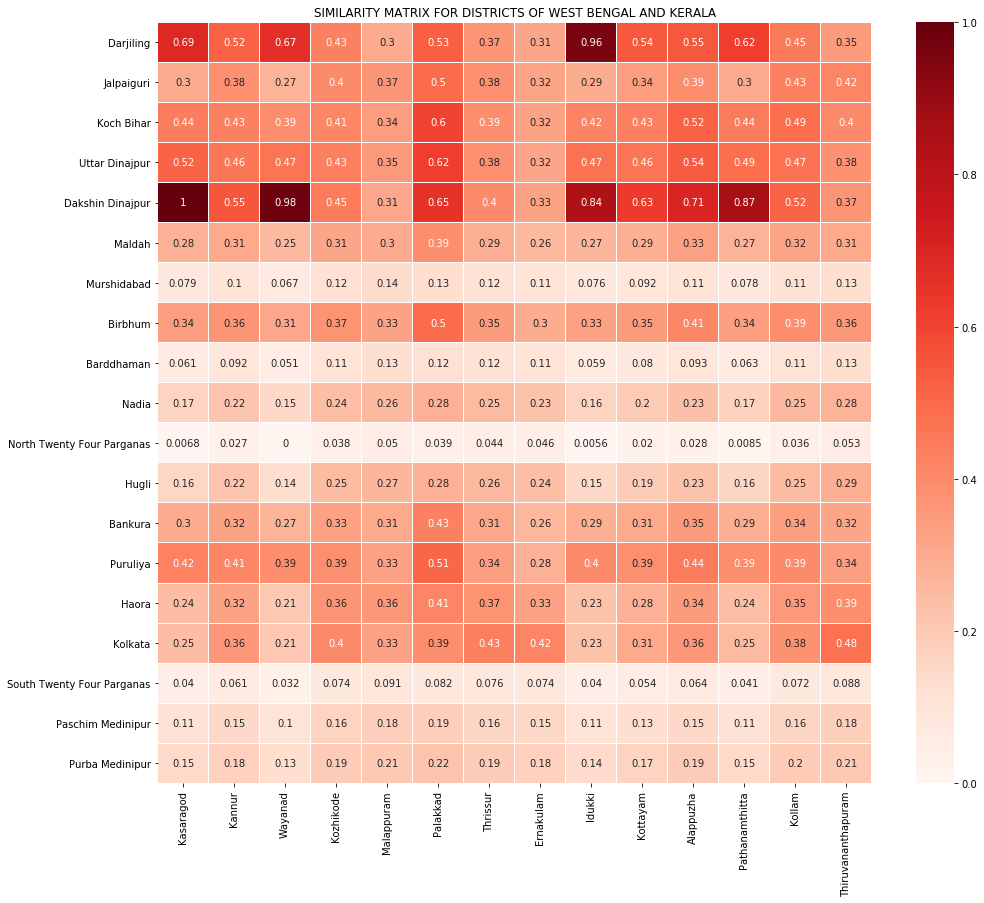

In [16]:
norm=Normalize()
ax = plt.axes()
# Plot the matrix using a heatmap from seaborn
# Values of the matrix are normalized so as to fall between 0 and 1
sns.heatmap(norm(sim_matrix), xticklabels=df_KERALA['District name'],yticklabels=df_WESTBENGAL['District name'],
            linewidths=0.05,annot=True,cmap='Reds').set_title("SIMILARITY MATRIX FOR DISTRICTS OF WEST BENGAL AND KERALA")
plt.rcParams['figure.figsize'] = (16,14)
plt.show()

# Updated

## Find out most similar districts in two states. Similarity based on selected category.

In [17]:
data_Category = data[['District code', 'State name', 'District name','SC','Male_SC','Female_SC','ST','Male_ST','Female_ST','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','Workers','Male_Workers','Female_Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers','Other_Workers','Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education','Literate_Education','Illiterate_Education','Total_Education','Male_Literate','Female_Literate','Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age not stated','LPG_or_PNG_Households','Housholds_with_Electric_Lighting','Households_with_Internet','Households_with_Computer','Households_with_Bicycle','Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped','Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only','Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone','Households_with_Telephone_Mobile_Phone_Both','Condition_of_occupied_census_houses_Dilapidated_Households','Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households','Type_of_bathing_facility_Enclosure_without_roof_Households','Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households','Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households','Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households','Not_having_bathing_facility_within_the_premises_Total_Households','Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households','Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households','Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households','Main_source_of_drinking_water_Other_sources_Households','Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households','Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households','Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households','Main_source_of_drinking_water_Tubewell_Borehole_Households','Household_size_1_person_Households','Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households','Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households','Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households','Location_of_drinking_water_source_Away_Households']].copy()
data_Category.head()

,District code,State name,District name,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,...,Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households,Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households,Not_having_bathing_facility_within_the_premises_Total_Households,Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households
0,1,JAMMU AND KASHMIR,Kupwara,1048,1046,2,70352,36913,33439,37128,823286,1700,5600,66,39,13,2522,229064,190899,38165,123837,105227,641290,34680,56759,...,2269,10919,40416,44123,11127,5030,1902,24776,6597,34882,37849,22747,1607,50339,2066,911,4036,4947,6396,31982,10700,14886,42727,27121,46181
1,2,JAMMU AND KASHMIR,Badgam,368,343,25,23912,12383,11529,10110,736054,1489,5559,47,6,2,478,214866,162578,52288,132003,82863,538879,55299,36630,...,1779,9208,15834,10642,699,9864,453,13064,1052,14705,33558,51358,136,73303,2321,845,2173,3018,3743,23640,7998,11899,59121,13440,14303
2,3,JAMMU AND KASHMIR,Leh(Ladakh),488,444,44,95857,47543,48314,22882,19057,658,1092,88635,103,54,1006,75079,53265,21814,57125,17954,58408,20869,1645,...,53,695,10473,1781,64,5991,620,6115,1565,8355,10962,3031,55,6254,135,1630,1483,3113,2302,10528,4422,3804,5378,1758,6784
3,4,JAMMU AND KASHMIR,Kargil,18,12,6,122336,62652,59684,10341,108239,604,1171,20126,28,4,289,51873,39839,12034,28941,22932,88929,8266,3763,...,37,9610,6325,482,1,3289,323,2641,907,4068,9218,1963,197,10769,19,689,834,1523,983,4991,1652,2356,6832,4866,7031
4,5,JAMMU AND KASHMIR,Punch,556,406,150,176101,90274,85827,32604,431279,958,11188,83,10,2,711,161393,117677,43716,73247,88146,315442,54264,31583,...,338,1174,69089,70470,17702,4036,12448,1351,5351,19458,33146,17078,308,43697,234,1531,7435,8966,10664,44517,15825,18028,31443,3952,38654


In [102]:
data_Category['State name'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ORISSA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'MAHARASHTRA', 'ANDHRA PRADESH',
       'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA', 'TAMIL NADU',
       'PONDICHERRY', 'ANDAMAN AND NICOBAR ISLANDS'], dtype=object)

In [104]:
df_category_state1 = data_Category.loc[data_Category['State name'] == 'CHHATTISGARH']
df_category_state2 = data_Category.loc[data_Category['State name'] == 'MAHARASHTRA']

In [105]:
df_category_state1.shape

(18, 92)

In [106]:
df_category_state2.shape

(35, 92)

# Grouping all the columns into meaningful demographics features

In [27]:
temp_df = pd.DataFrame([caste, religion, workers,education, age, basic_needs, socio_economic_status, living_standards], index=['Caste', 'Religion', 'Workers', 'Education', 'Age', 'Basic_needs', 'Socio_economic_status', 'Living_standards'])
temp_df = temp_df.T
temp_df.fillna(0)

,Caste,Religion,Workers,Education,Age,Basic_needs,Socio_economic_status,Living_standards
0,SC,Hindus,Workers,Below_Primary_Education,Age_Group_0_29,LPG_or_PNG_Households,Households_with_Bicycle,Condition_of_occupied_census_houses_Dilapidate...
1,Male_SC,Muslims,Male_Workers,Primary_Education,Age_Group_30_49,Housholds_with_Electric_Lighting,Households_with_Car_Jeep_Van,Households_with_separate_kitchen_Cooking_insid...
2,Female_SC,Christians,Female_Workers,Middle_Education,Age_Group_50,Households_with_Internet,Households_with_Radio_Transistor,Having_bathing_facility_Total_Households
3,ST,Sikhs,Main_Workers,Secondary_Education,Age not stated,Households_with_Computer,Households_with_Scooter_Motorcycle_Moped,Having_latrine_facility_within_the_premises_To...
4,Male_ST,Buddhists,Marginal_Workers,Higher_Education,0,0,Households_with_Telephone_Mobile_Phone_Landlin...,Ownership_Owned_Households
5,Female_ST,Jains,Non_Workers,Graduate_Education,0,0,Households_with_Telephone_Mobile_Phone_Mobile_...,Ownership_Rented_Households
6,0,Others_Religions,Cultivator_Workers,Other_Education,0,0,Households_with_TV_Computer_Laptop_Telephone_m...,Type_of_bathing_facility_Enclosure_without_roo...
7,0,Religion_Not_Stated,Agricultural_Workers,Literate_Education,0,0,Households_with_Television,Type_of_fuel_used_for_cooking_Any_other_Househ...
8,0,0,Household_Workers,Illiterate_Education,0,0,Households_with_Telephone_Mobile_Phone,Type_of_latrine_facility_Pit_latrine_Households
9,0,0,Other_Workers,Total_Education,0,0,Households_with_Telephone_Mobile_Phone_Both,Type_of_latrine_facility_Other_latrine_Households



Mahasamund and Hingoli are most similar
Similarity Score: 16.065556436105393

Under parameters: 

District code
State name
District name
SC
Male_SC
Female_SC
ST
Male_ST
Female_ST
Hindus
Muslims
Christians
Sikhs
Buddhists
Jains
Others_Religions
Religion_Not_Stated
Workers
Male_Workers
Female_Workers
Main_Workers
Marginal_Workers
Non_Workers
Cultivator_Workers
Agricultural_Workers
Household_Workers
Other_Workers
Below_Primary_Education
Primary_Education
Middle_Education
Secondary_Education
Higher_Education
Graduate_Education
Other_Education
Literate_Education
Illiterate_Education
Total_Education
Male_Literate
Female_Literate
Age_Group_0_29
Age_Group_30_49
Age_Group_50
Age not stated
LPG_or_PNG_Households
Housholds_with_Electric_Lighting
Households_with_Internet
Households_with_Computer
Households_with_Bicycle
Households_with_Car_Jeep_Van
Households_with_Radio_Transistor
Households_with_Scooter_Motorcycle_Moped
Households_with_Telephone_Mobile_Phone_Landline_only
Households_with_Telephon

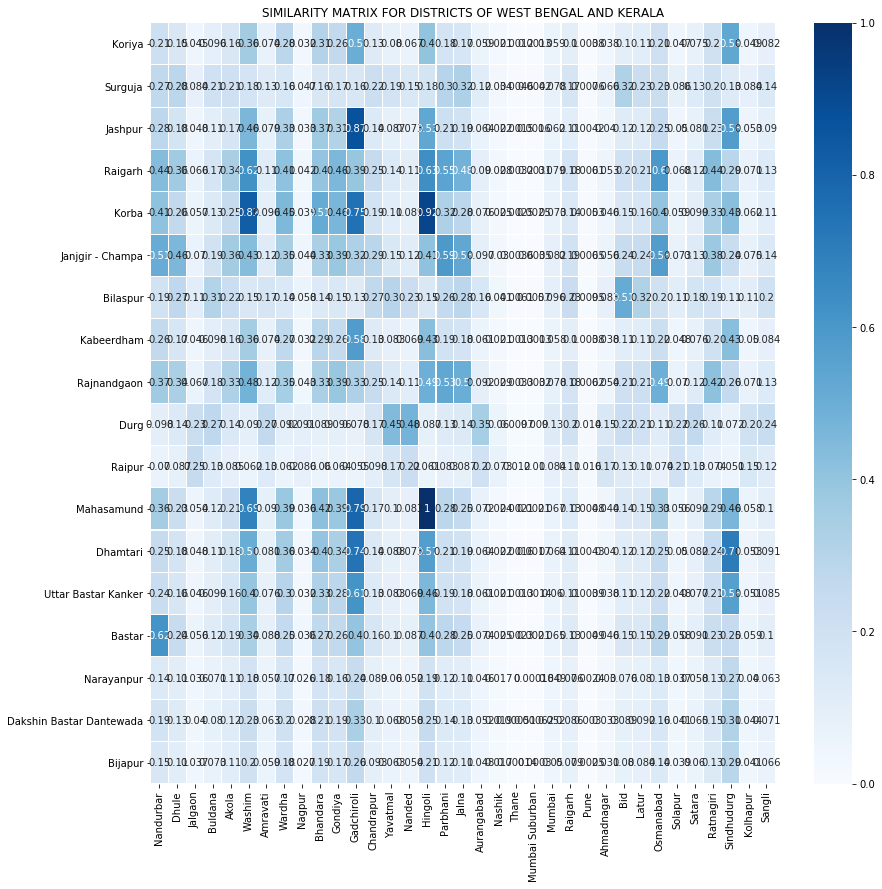

In [108]:
def similar_districts(df1, df2,category,sub_category):
    norm = Normalize()
    # Set indices for both the data frames
    df1.set_index('District code')
    df2.set_index('District code')
    
    # The similarity matrix of size len(df1) X len(df2)
    main_diff = []
    
    if (category or sub_category) == 0:
        
        # Iterate through rows of df1
        for row1 in df1.iterrows():
            
            # Create list to hold similarity score of row1 with other rows of df2
            diff=[]
            
            # Iterate through rows of df2
            for row2 in df2.iterrows():
                
                # Calculate sum of squared differences
                SSE = 0
                
                for cat in list(temp_df.columns):
                    
                    for i in range(len(temp_df)):
                        
                        if isinstance(temp_df[cat][i],str):
                            max_col = max(data_Category[temp_df[cat][i]])
                            min_col = min(data_Category[temp_df[cat][i]])     
                            SSE += pow((row1[1][temp_df[cat][i]] - row2[1][temp_df[cat][i]])/(max_col - min_col),2)
                        
                # Take sqrt and inverse the result
                diff.append(1/np.sqrt(SSE))
            
            # Append similarity scores
            main_diff.append(diff)

        # Find the max value of similarity score from lists of lists
        max_val = 0
        max_index1 = 0
        max_index2 = 0
        for i in range(len(main_diff)):

            for j in range(len(main_diff[i])):
                if(main_diff[i][j] > max_val):
                    max_val = main_diff[i][j]
                    max_index1 = i
                    max_index2 = j
                
        print ("\n%s and %s are most similar" %(df1['District name'].iloc[max_index1],df2['District name'].iloc[max_index2]))
        print ("Similarity Score: %s" %(max_val))
        print ("\nUnder parameters: \n")
        for col in data_Category.columns: 
            print(col) 
                
        return main_diff
    
    # Running another instance where category is given
    elif (category!=0) and (sub_category==0):
        
        # Iterate through rows of df1
        for row1 in df1.iterrows():
            
            # Create list to hold similarity score of row1 with other rows of df2
            diff=[]
            
            # Iterate through rows of df2
            for row2 in df2.iterrows():
                
                # Calculate sum of squared differences
                SSE = 0
                
                for i in temp_df[category]:
                        
                    if isinstance(i,str):
                        max_col = max(data_Category[i])
                        min_col = min(data_Category[i])     
                        SSE += pow((row1[1][i] - row2[1][i])/(max_col - min_col),2)
                        
                # Take sqrt and inverse the result
                diff.append(1/np.sqrt(SSE))
            
            # Append similarity scores
            main_diff.append(diff)

        # Find the max value of similarity score from lists of lists
        max_val = 0
        max_index1 = 0
        max_index2 = 0
        for i in range(len(main_diff)):

            for j in range(len(main_diff[i])):
                if(main_diff[i][j] > max_val):
                    max_val = main_diff[i][j]
                    max_index1 = i
                    max_index2 = j
                
        print ("\n%s and %s are most similar" %(df1['District name'].iloc[max_index1],df2['District name'].iloc[max_index2]))
        print ("Similarity Score: %s" %(max_val))
        print ("\nUnder parameters: \n")
        for col in data_Category.columns: 
            print(col) 
                
        return main_diff
    
    elif (category and sub_category)!=0:
        
        # Iterate through rows of df1
        for row1 in df1.iterrows():
            
            # Create list to hold similarity score of row1 with other rows of df2
            diff=[]
            
            # Iterate through rows of df2
            for row2 in df2.iterrows():
                
                # Calculate sum of squared differences
                SSE = 0
                max_col = max(data_Category[sub_category])
                min_col = min(data_Category[sub_category])     
                SSE = pow((row1[1][sub_category] - row2[1][sub_category])/(max_col - min_col),2)
                        
                # Take sqrt and inverse the result
                diff.append(1/np.sqrt(SSE))
            
            # Append similarity scores
            main_diff.append(diff)

        # Find the max value of similarity score from lists of lists
        max_val = 0
        max_index1 = 0
        max_index2 = 0
        for i in range(len(main_diff)):

            for j in range(len(main_diff[i])):
                if(main_diff[i][j] > max_val):
                    max_val = main_diff[i][j]
                    max_index1 = i
                    max_index2 = j
                     
        print ("\n%s and %s are most similar" %(df1['District name'].iloc[max_index1],df2['District name'].iloc[max_index2]))
        print ("Similarity Score: %s" %(max_val))
        print ("\nUnder parameters: \n")
        for col in data_Category.columns: 
            print(col) 
                
        return main_diff
                   
sim_matrix_category = similar_districts(df_category_state1, df_category_state2,'Education',0)

norm=Normalize()
ax = plt.axes()
# Plot the matrix using a heatmap from seaborn
# Values of the matrix are normalized so as to fall between 0 and 1
sns.heatmap(norm(sim_matrix_category), xticklabels=df_category_state2['District name'],yticklabels=df_category_state1['District name'],
            linewidths=0.05,cmap='Blues',annot=True).set_title("SIMILARITY MATRIX FOR DISTRICTS OF WEST BENGAL AND KERALA")
plt.rcParams['figure.figsize'] = (20,20)

print("\n")

## Create a geographic map of states with low literacy rates.

Step 1. Group all the rows of the same state together

Step 2. Iterate through each group and calculate the total population and total literate population for that particular state.

Step 3. Literacy rate = (total literate population / total population) * 100

Step 4. Store the results for each state

Step 5. Plot the results in a geographic map of India

In [42]:
'''
Calculating state wise literacy rates
'''

# Group the data state-wise
states_group = data.groupby(by = "State name")

# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += row[1][3] # 3 is the index of column 'Population'
        total_literate_pop += row[1][6] # 6 is the index of column 'Literate'
    
    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))
    
print ("Statewise literacy rates : \n")
print (literacy_rate)

Statewise literacy rates : 

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PU

Lets inquire about the bottom 5 states with respect to literacy rates 

In [45]:
literacy_rate.sort(key = operator.itemgetter(1))
print(literacy_rate[:5])

[('BIHAR', 50.43691584466746), ('ARUNACHAL PRADESH', 55.35810170647822), ('JHARKHAND', 55.55958090869887), ('RAJASTHAN', 55.8368413272501), ('JAMMU AND KASHMIR', 56.351669069128555)]


#### States like Bihar, Arunachal Pradesh, Jharkhand, Rajasthan and Jammu Kashmir have low literacy rates. This can be also verified by the map of India visualized for literacy rates above as well.



One important thing to note here is this: 

Literacy is defined as the ability to read, write and use arithmetic, for people having **age more than 7 years**.
 
In our calculations, we have also counted children aged from 0-6 years in total population. The correct way to calculate it would be to subtract child population from total population and then compute the percentage.

Because there is no related column in our data which states no. of children(age 0-6), are results are slightly lesser than the actual literacy rates, but the overall visualization for the above heatmap seems reasonable and is relatable with the actual data.

**PLOTTING A GEOGRAPHIC MAP FOR STATEWISE LITERACY RATES**

**1. Getting coordinates**

We take help of this awesome tool called [Bounding box tool](http://boundingbox.klokantech.com/) for getting coordinates of India so that we can draw the same as a matplotlib plot. Search for 'India' in the search area provided.
At the bottom there is a box with some longitude and latitudes in. 

To the left of that there is a drop down menu, click that and select DublinCore; this is the easiest format to understand in my opinion and it’s in a form that can be directly used in Basemap. The first two numbers labeled ‘westlimit’ and ‘southlimit’ are the latitude and longitude of your lower left corner. The other two, labelled ‘eastlimit’ and ‘northlimit’ are the latitude and longitude of your upper right corner.

**2. Creating a map**

We will create a figure to draw our map on and then create our map.
With the *drawmapboundary()* function we can set the colour of the seas and oceans on our map. Here I have set it to a light blue colour. The *fillcontinents()* function does just as it suggests, this is the colour of land masses. I have set them to a light-grey colour and have set lakes to the same colour as I set the sea. Finally the *drawcoastlines()* function draws lines around the land masses.

**3. Using Shapefiles for drawing states**

Download shape file of India from [here](https://www.arcgis.com/home/item.html?id=cf9b387de48248a687aafdd4cdff1127) .Using *readshapefile()* the shape file is loaded.
The first argument is the path to the shapefile. The second is the name that will be used to access the shapefile.

**4. Creating a dataframe mapping shapes to literacy rates and state names**

Our shapefile contains multiple shapes for each state, so we need to map each state's literacy rate and state name correctly. We then create a dataframe combining all the three.

**5. Using data to color areas**

Finally, we color all the states according to their literacy rates. Darker shade represents higher literacy rates while a lighter shade represents a lower literacy rates.



C:\Users\jites\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\jites\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


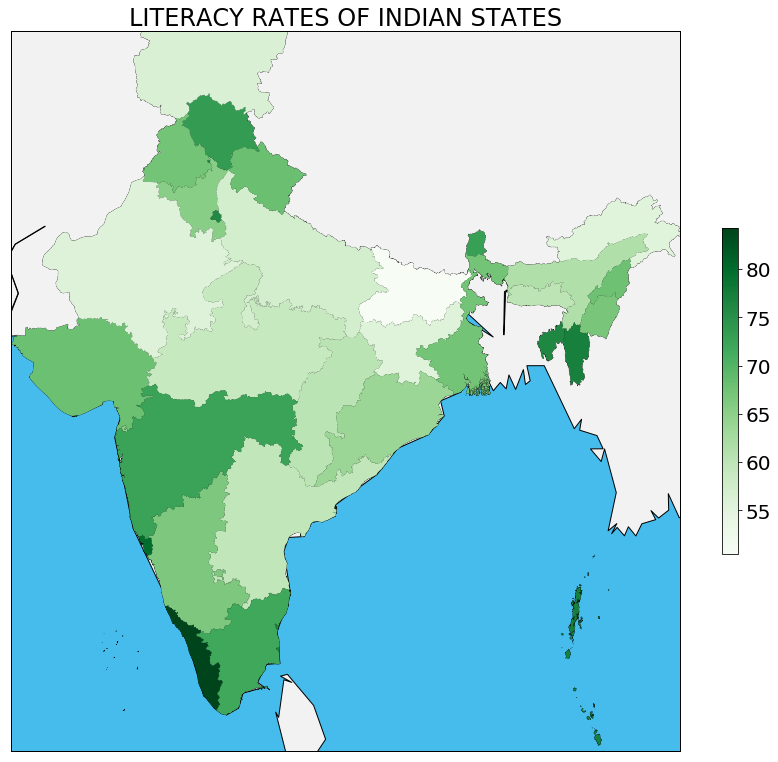

In [49]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
STEP 3 : USING SHAPEFILES FOR DRAWING STATES 
'''
# C:/Users/jites/Desktop/India-Census-2011-Analysis-master/India_SHP/INDIA
# Load the shape file of India
m.readshapefile("C:/Users/jites/Desktop/India-Census-2011-Analysis-master/India_SHP/INDIA","INDIA")


'''
STEP 4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND LITERACY RATES
'''
# Create an empty list to hold literacy rates
lit_rate = []
# Iterate through all rows of INDIA_info file
# Each row is a dictionary. Here, we try to map state name with literacy rate
for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['ST_NAME'].upper()
    # initialize rate = 0
    rate = 0
    
    # In literacy_rate (containing tuples of state name and literacy rates), search for state 'state'
    # Append its corresponding literacy rate to lit_rate
    for x in literacy_rate:
        if x[0] == state:
            rate = x[1]
            break
    lit_rate.append(rate)            
    
# Create a dataframe containing shapes, state names and literacy rates    
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['ST_NAME'] for area in m.INDIA_info],
        'lit_rate' : lit_rate
    })

'''
STEP 5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Greens')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the literacy rate of the state
pc.set_facecolor(cmap(norm(df_poly['lit_rate'].fillna(0).values)))
ax.add_collection(pc)

# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(lit_rate)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("LITERACY RATES OF INDIAN STATES")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams.update({'font.size': 20})
plt.show()

In [56]:
import os
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from app import app

df1 = pd.read_csv("https://raw.githubusercontent.com/divyachandran-ds/dash1/master/Energy2.csv")
df = df1.dropna()

if 'DYNO' in os.environ:
    app_name = os.environ['DASH_APP_NAME']
else:
    app_name = 'dash-heatmapplot'

layout = html.Div(
    [html.Div([html.H1("Energy Consumption Profile by Country")], className="row", style={'textAlign': "center"}),
     html.Div(
         [dcc.Dropdown(id="selected-type", options=[{"label": i, "value": i} for i in df["Indicator Name"].unique()],
                       value='CO2 emissions from gaseous fuel consumption (% of total)',
                       style={"display": "block", "margin-left": "auto", "margin-right": "auto", "width": "80%"})],
         className="row"),
     html.Div([dcc.Graph(id="my-graph", style={"margin-right": "auto", "margin-left": "auto", "width": "80%"})],
              className="row")
     ], className="container")


@app.callback(
    Output("my-graph", "figure"),
    [Input("selected-type", "value")])
def update_figure(selected):
    dff = df[df["Indicator Name"] == selected]
    trace = go.Heatmap(x=dff.columns.values[3:], y=dff['Country Name'].unique(), z=dff[
        ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
         '2014']].values, colorscale='Electric', colorbar={"title": "Percentage"}, showscale=True)
    return {"data": [trace],
            "layout": go.Layout(width=800, height=750, title=f"{selected.title()} vs Year", xaxis={"title": "Year"},
                                yaxis={"title": "Country", "tickmode": "array",
                                       "tickvals": dff['Country Name'].unique(),
                                       "ticktext": ['Afghanistan', 'Arab World', 'Australia', 'Belgium', 'Bangladesh',
                                                    'Brazil', 'Canada', 'Colombia', 'Germany', 'East Asia & Pacific',
                                                    'Europe &<br>Central Asia', 'India', 'Japan',
                                                    'Latin America &<br>Caribbean', 'Middle East &<br>North Africa',
                                                    'Mexico', 'North America', 'Saudi Arabia', 'Singapore',
                                                    'Virgin Islands (US)', 'South Africa', 'Zimbabwe'],
                                       "tickfont": {"size": 8}, "tickangle": -20}, )}


ModuleNotFoundError: No module named 'app'